<a href="https://colab.research.google.com/github/tom-cruz/StudentPerformance/blob/master/Student_Performance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Student Performance with Machine Learning

## Data Import

In [0]:
# Import libraries
import pandas as pd
import numpy as np
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt

### Data Source

In [0]:
# Specify website with data
website = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

### Student Performance Metadata

In [4]:
# Request data from URL
url = urlopen(website)

# Open files from zip
with ZipFile(BytesIO(url.read())) as zip:
  dataFields = zip.open("student.txt")
  mathScores = pd.read_csv(zip.open("student-mat.csv"),sep=";")
  langScores = pd.read_csv(zip.open("student-por.csv"),sep=";")
  
  # Read text file line-by-line
  line = dataFields.readline().decode("utf-8")
  while line:
      print(line.strip())
      line = dataFields.readline().decode("utf-8")

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

### Student Performance Data

In [5]:
# Preview table of Math scores
mathScores.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [6]:
# Preview table of Portuguese scores
langScores.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


## Exploratory Data Analysis

In [39]:
# Ensure both tables have same column names
print("Column names consistent across tables: ", all(mathScores.columns == langScores.columns))

Column names consistent across tables:  True


In [0]:
# Define Summary Statistics Function
def eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)

### Math Scores

#### *Column Names*

In [40]:
# Inspect column names
print(mathScores.columns,"\n")

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object') 



#### *Data Types*

In [8]:
# Inspect data types in table
mathScores.dtypes.value_counts()

object    17
int64     16
dtype: int64

####*Summary Statistics*

In [10]:
# View summary statistics of fields of numerical data type
eda(mathScores.select_dtypes(include=['int64']))

,null_sum,null_pct,dtypes,count,mean,median,min,max
age,0,0.0,int64,395,16.696203,17.0,15,22
Medu,0,0.0,int64,395,2.749367,3.0,0,4
Fedu,0,0.0,int64,395,2.521519,2.0,0,4
traveltime,0,0.0,int64,395,1.448101,1.0,1,4
studytime,0,0.0,int64,395,2.035443,2.0,1,4
failures,0,0.0,int64,395,0.334177,0.0,0,3
famrel,0,0.0,int64,395,3.944304,4.0,1,5
freetime,0,0.0,int64,395,3.235443,3.0,1,5
goout,0,0.0,int64,395,3.108861,3.0,1,5
Dalc,0,0.0,int64,395,1.481013,1.0,1,5


####*Correlation Heatmap*

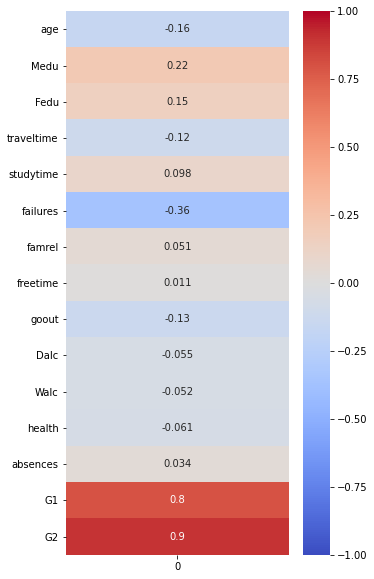

In [42]:
# Generate Correlation Heatmap of Numeric Fields with G3 Score
mathCorrelations = mathScores.select_dtypes(include=['int64']).corrwith(mathScores['G3']).iloc[:-1].to_frame()
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(mathCorrelations, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

####*Pair Plot*

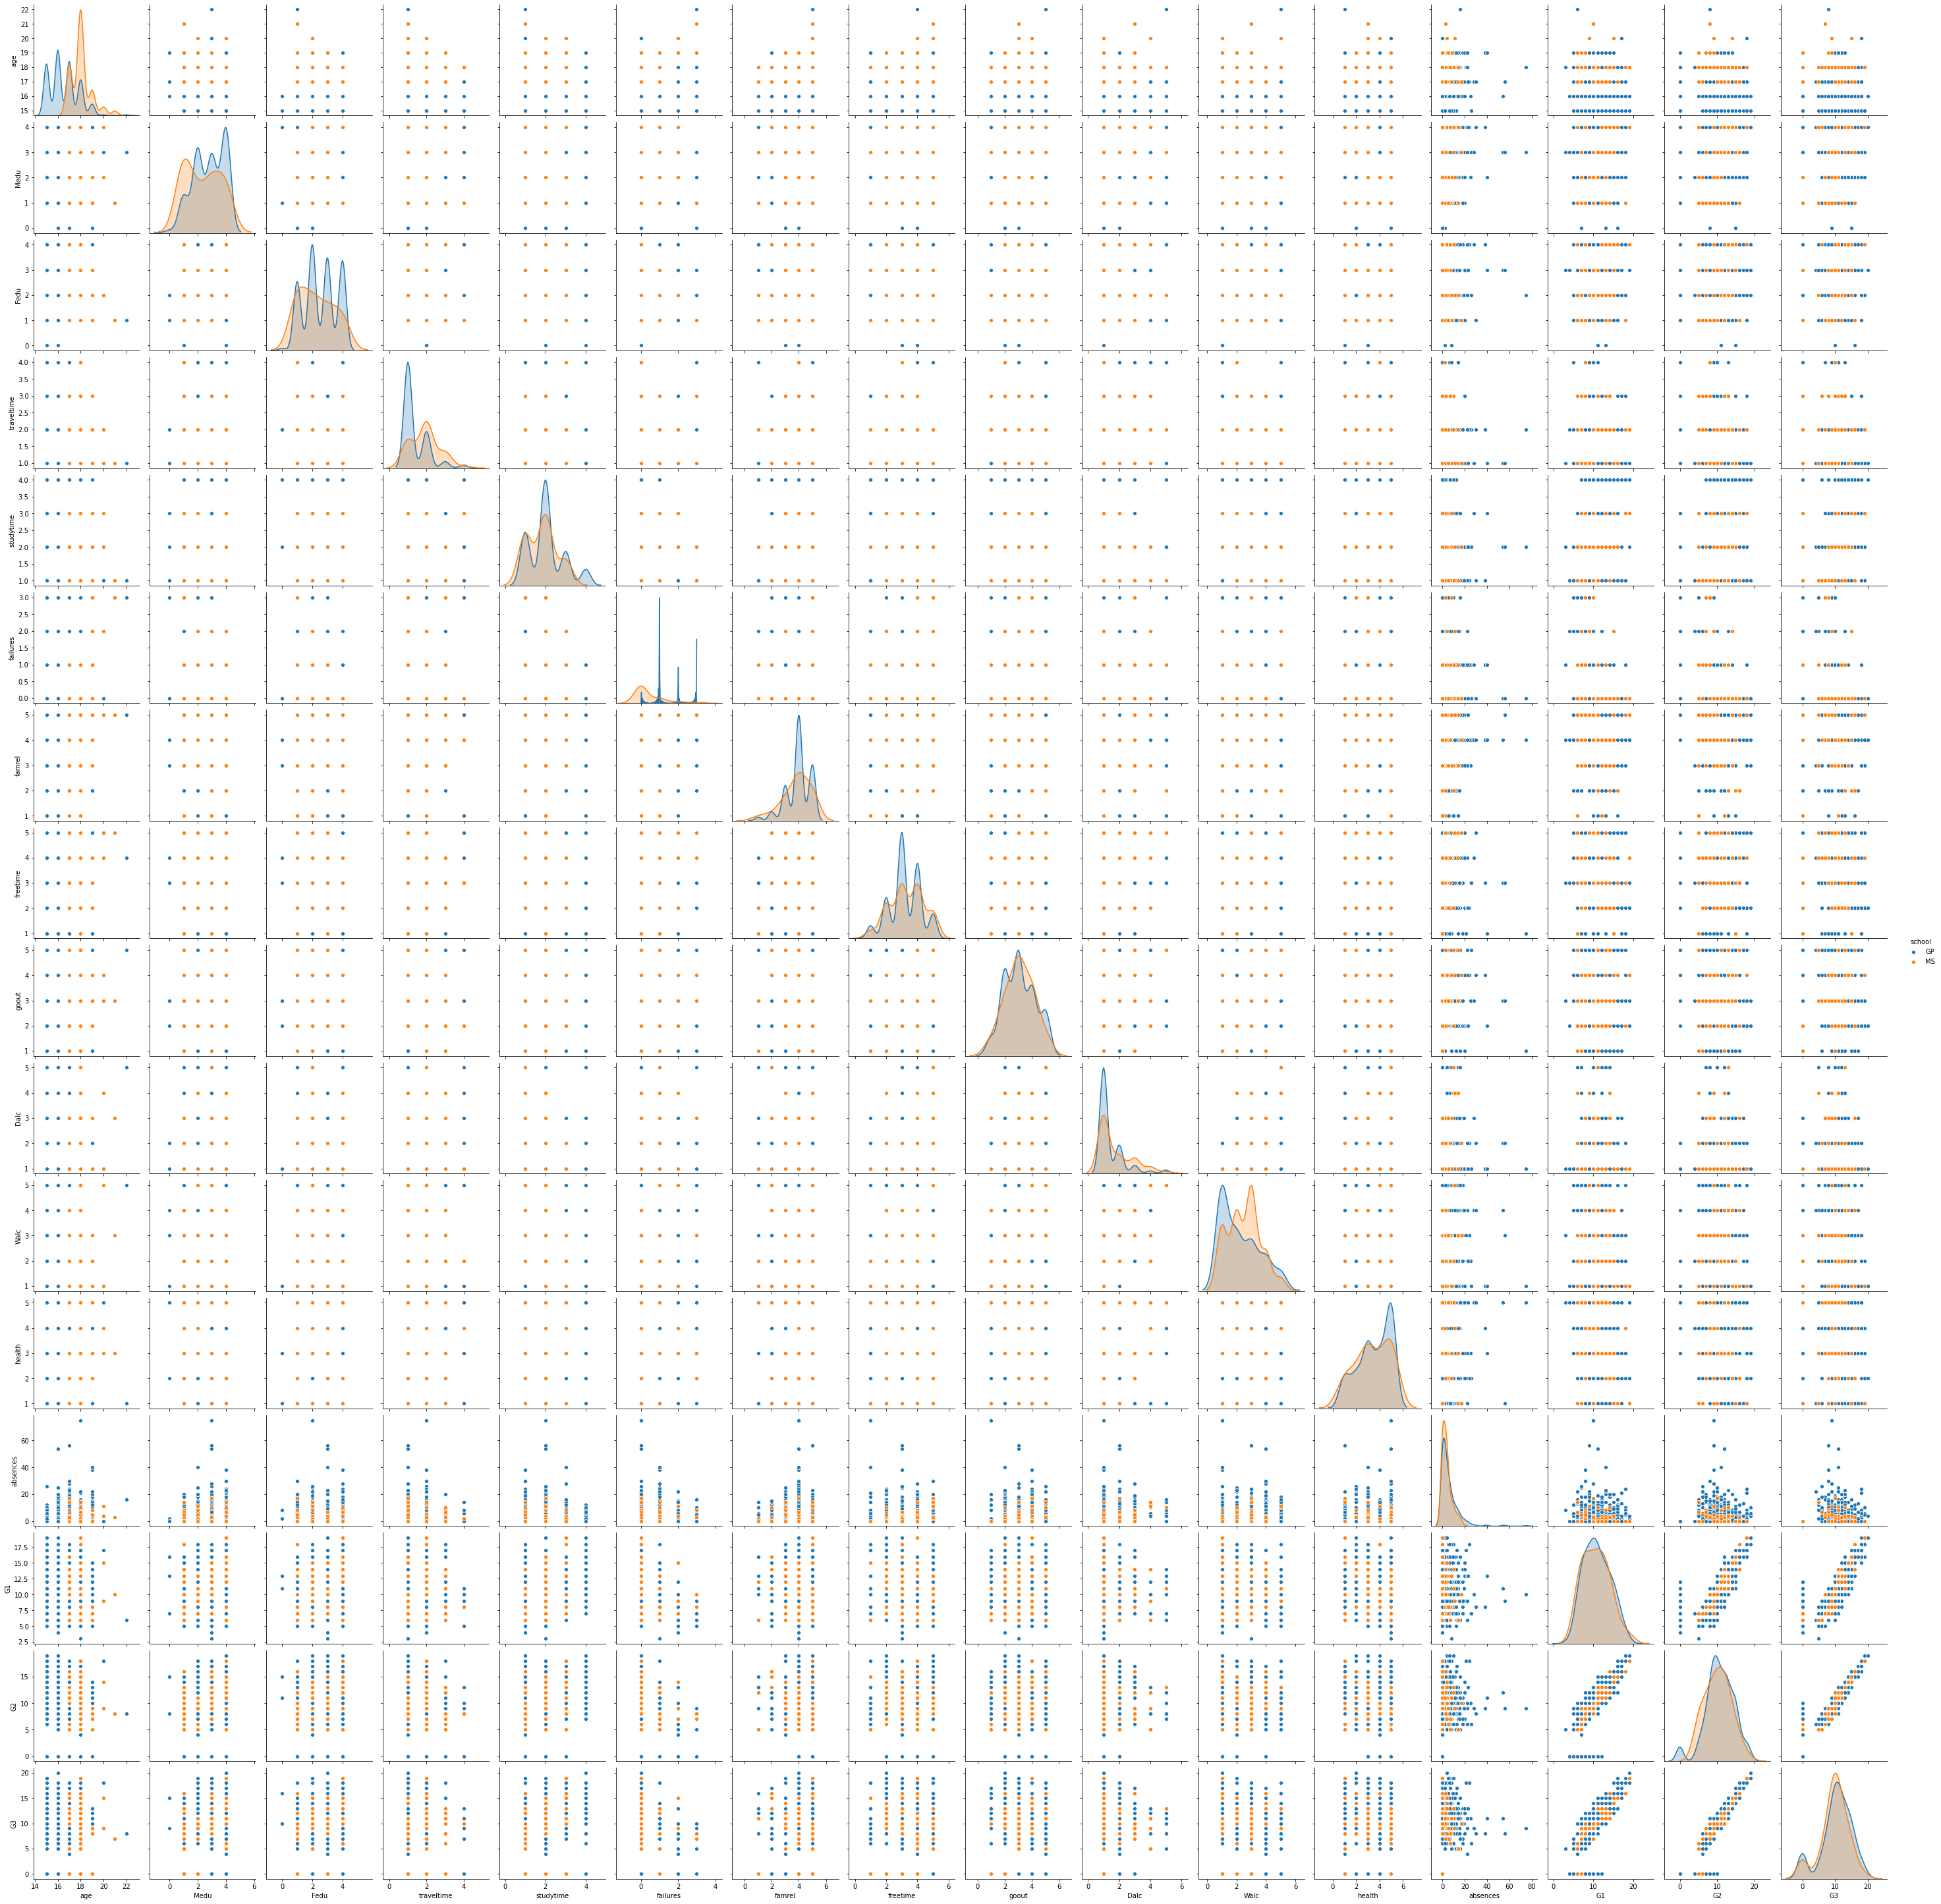

In [44]:
# Plot Correlation Matrix of numerical data fields
sns.pairplot(mathScores, hue='school')

####*Density Plots*

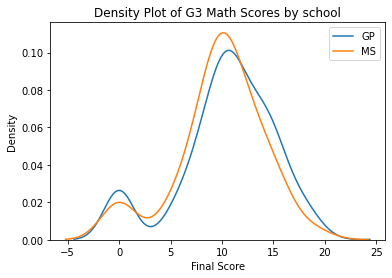

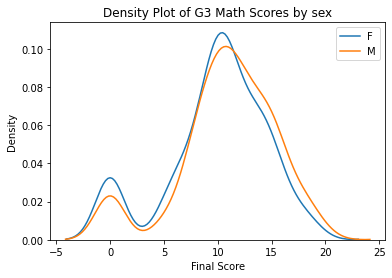

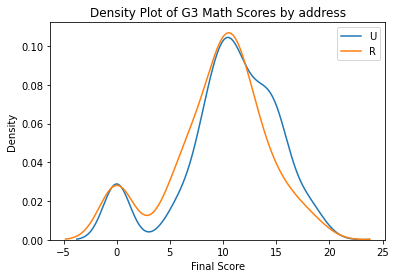

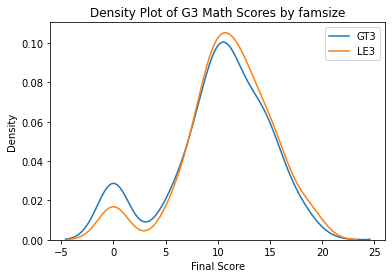

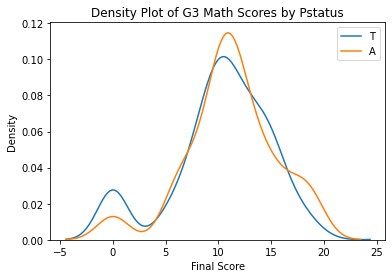

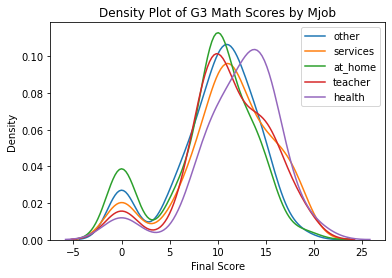

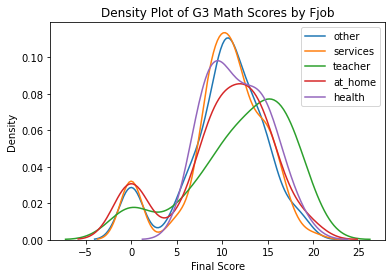

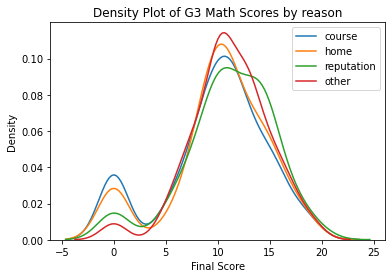

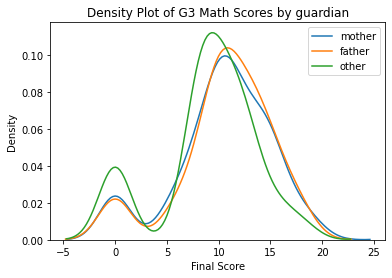

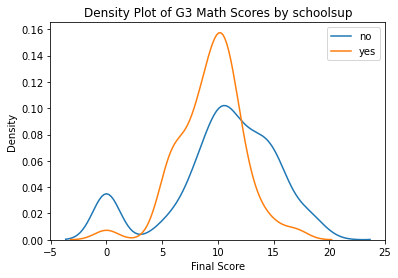

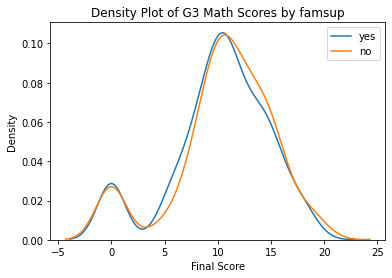

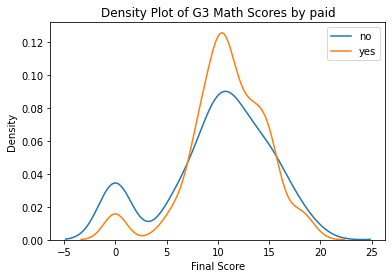

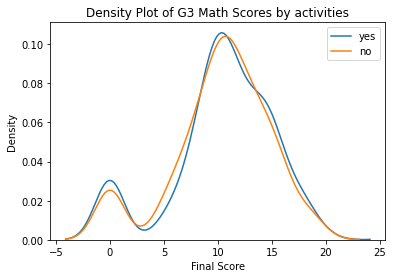

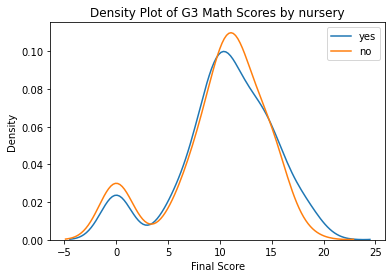

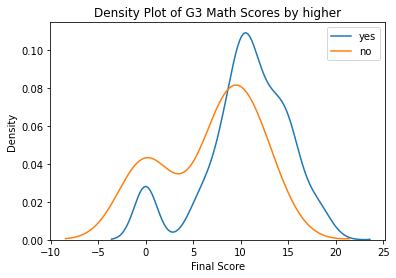

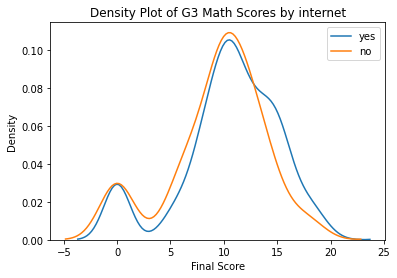

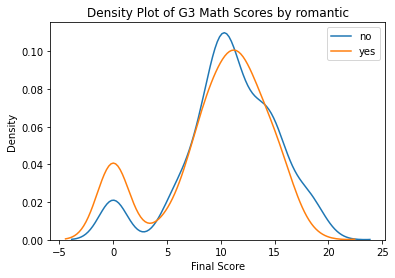

In [29]:
# Plot boxplots of categorical data fields with target
for col in mathScores.select_dtypes(include=['object']).columns:
  
  # Create a list of buildings with more than 100 measurements
  types = list(mathScores[col].value_counts().index)

  # Density plots of G3 Math Scores by catrgorical features
  for cat_type in types:
    sns.kdeplot(mathScores[mathScores[col] == cat_type]['G3'], label=cat_type)
  
  # Plot Labels and Title
  plt.xlabel("Final Score")
  plt.ylabel("Density")
  plt.title("Density Plot of G3 Math Scores by " + col)
  plt.show()

### Portuguese Scores

#### *Column Names*

In [41]:
# Inspect column names
print(langScores.columns,"\n")

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object') 



#### *Data Types*

In [16]:
# Inspect data types in table
langScores.dtypes.value_counts()

object    17
int64     16
dtype: int64

####*Summary Statistics*

In [17]:
# View summary statistics of fields of numerical data type
eda(langScores.select_dtypes(include=['int64']))

,null_sum,null_pct,dtypes,count,mean,median,min,max
age,0,0.0,int64,649,16.744222,17.0,15,22
Medu,0,0.0,int64,649,2.514638,2.0,0,4
Fedu,0,0.0,int64,649,2.306626,2.0,0,4
traveltime,0,0.0,int64,649,1.568567,1.0,1,4
studytime,0,0.0,int64,649,1.930663,2.0,1,4
failures,0,0.0,int64,649,0.221880,0.0,0,3
famrel,0,0.0,int64,649,3.930663,4.0,1,5
freetime,0,0.0,int64,649,3.180277,3.0,1,5
goout,0,0.0,int64,649,3.184900,3.0,1,5
Dalc,0,0.0,int64,649,1.502311,1.0,1,5


####*Correlation Heatmap*

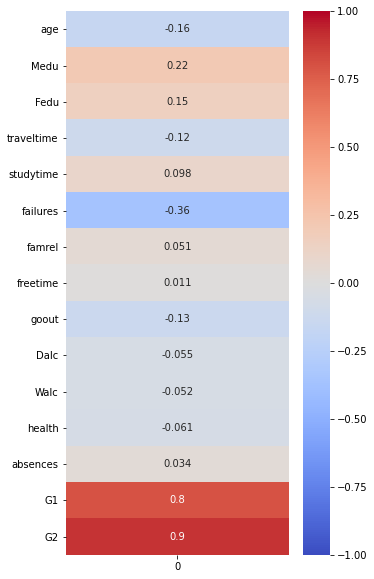

In [0]:
# Generate Correlation Heatmap of Numeric Fields with G3 Score
langCorrelations = langScores.select_dtypes(include=['int64']).corrwith(langScores['G3']).iloc[:-1].to_frame()
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(langCorrelations, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

####*Pair Plot*

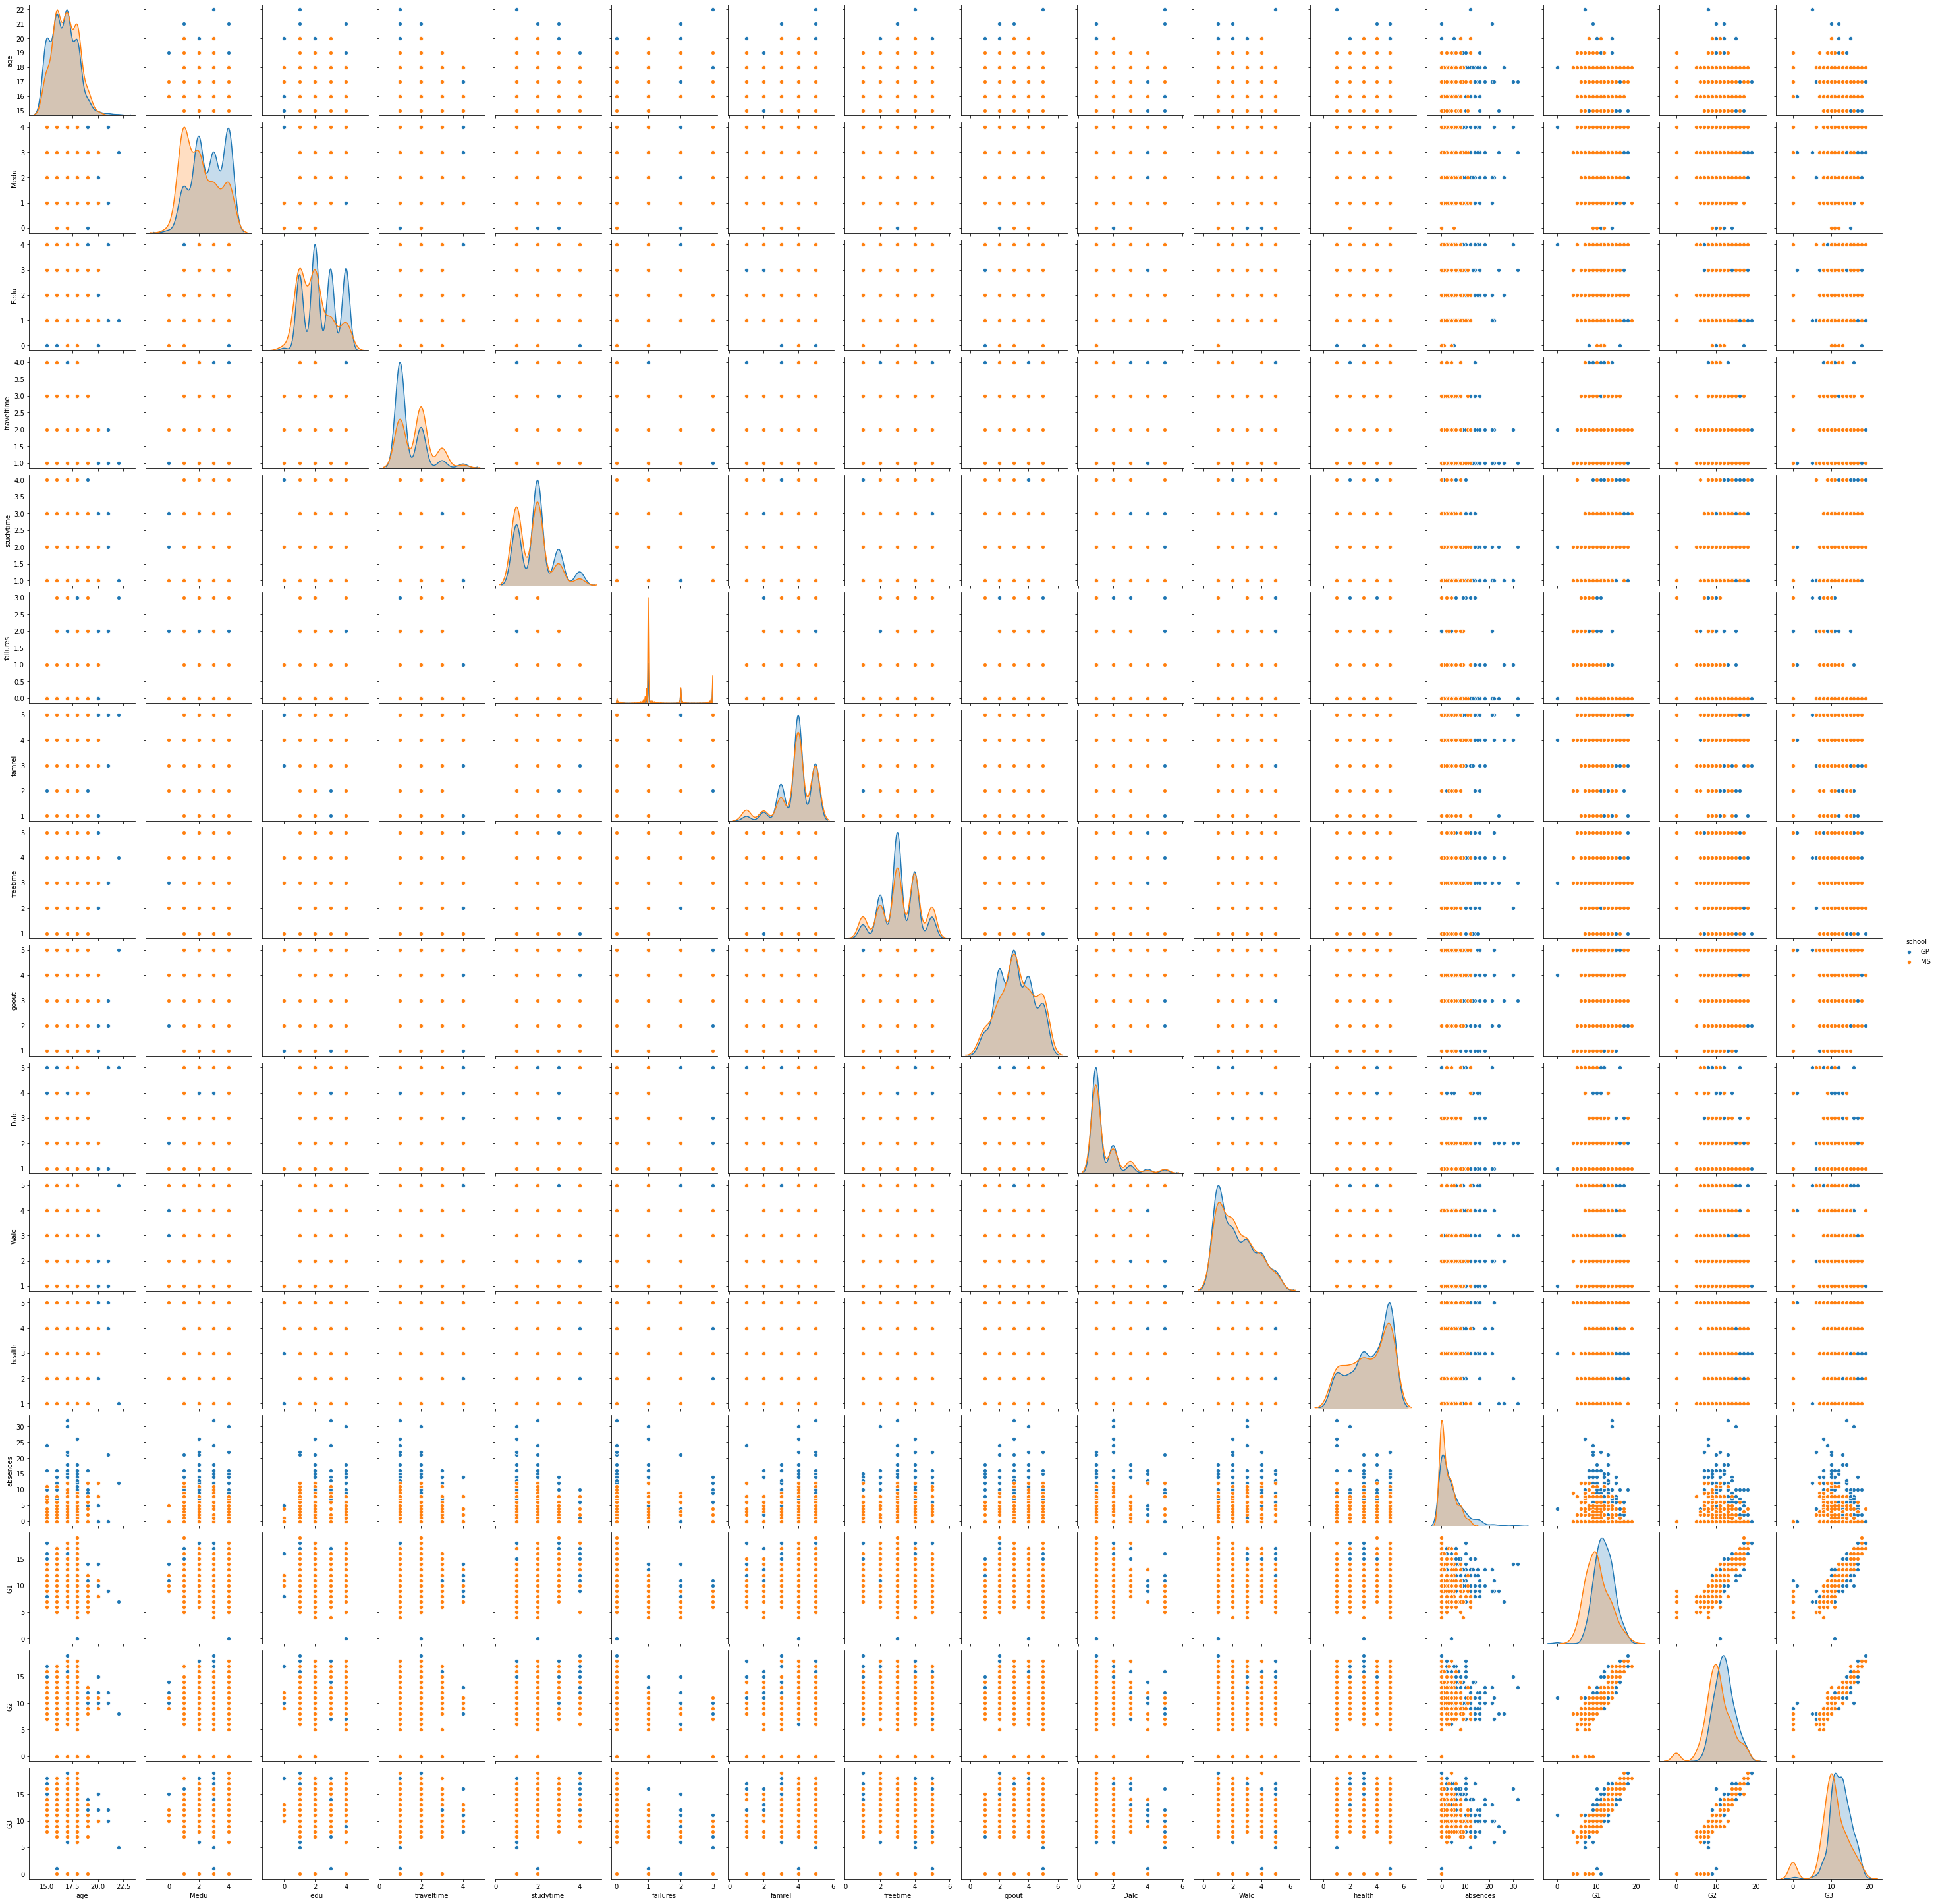

In [45]:
# Plot Correlation Matrix of numerical data fields
sns.pairplot(langScores, hue='school')

####*Density Plots*

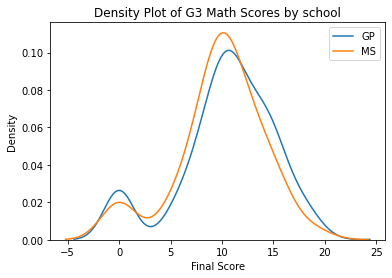

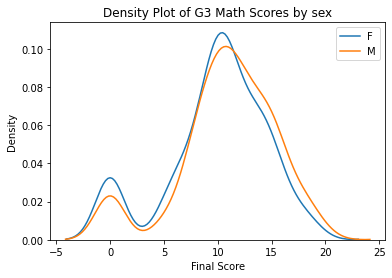

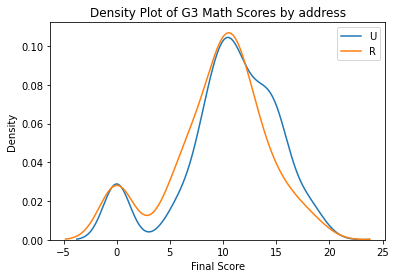

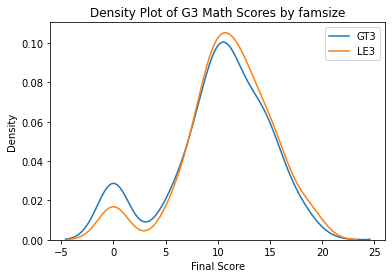

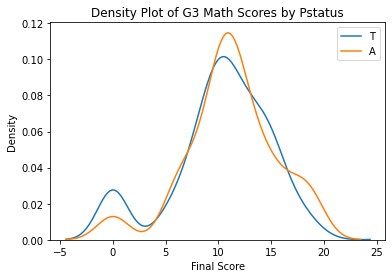

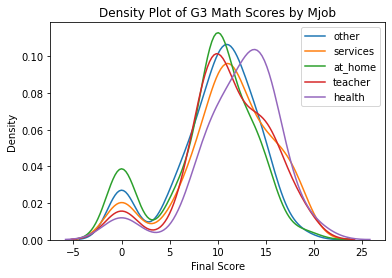

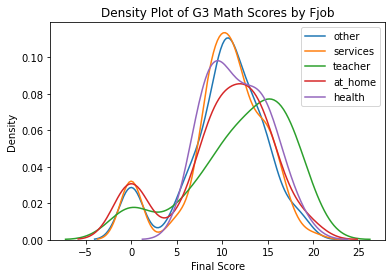

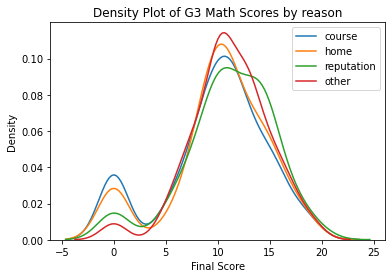

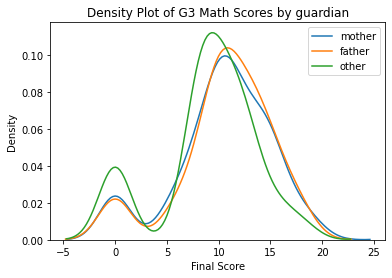

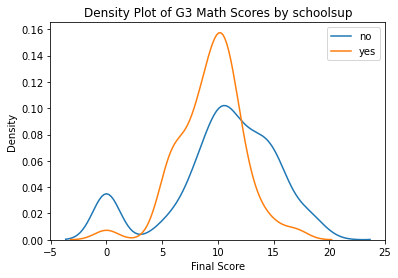

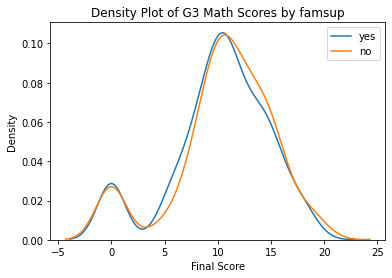

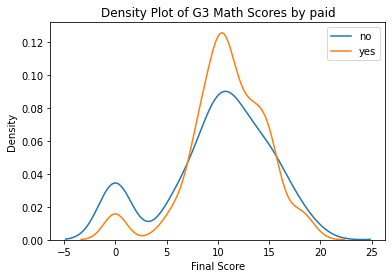

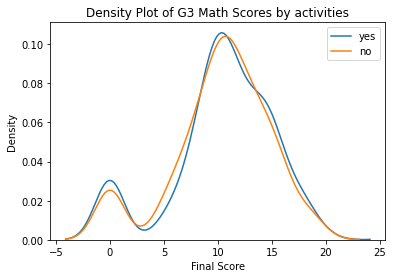

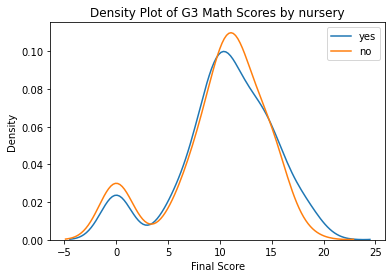

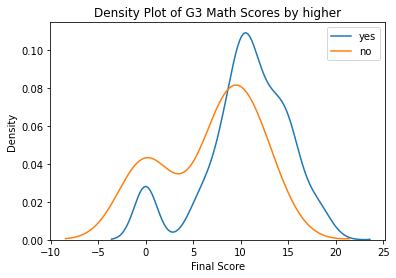

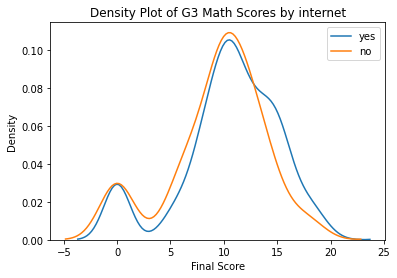

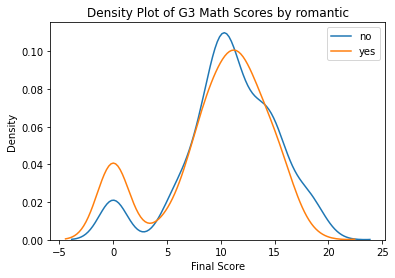

In [0]:
# Plot boxplots of categorical data fields with target
for col in langScores.select_dtypes(include=['object']).columns:
  
  # Create a list of buildings with more than 100 measurements
  types = list(langScores[col].value_counts().index)

  # Density plots of G3 Math Scores by catrgorical features
  for cat_type in types:
    sns.kdeplot(langScores[langScores[col] == cat_type]['G3'], label=cat_type)
  
  # Plot Labels and Title  
  plt.xlabel("Final Score")
  plt.ylabel("Density")
  plt.title("Density Plot of G3 Portuguese Scores by " + col)
  plt.show()

## Feature Engineering and Selection

### Feature Subset

### One-Hot Encoding

## Machine Learning Models

### Decision Tree

### Support Vector Machine

### Comparison of Models

## Hyperparameter Tuning

## Model Evaluation

## Results

## Conclusions